In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
import numpy as np

import tensorflow as tf
import scipy
from tensorflow.keras import layers,Sequential

In [4]:
abnormal_train = os.path.join("C:/Users/hp/Downloads/xray_dataset_covid19/train/PNEUMONIA")
normal_train = os.path.join("C:/Users/hp/Downloads/xray_dataset_covid19/train/NORMAL")

abnormal_test = os.path.join("C:/Users/hp/Downloads/xray_dataset_covid19/test/PNEUMONIA")
normal_test = os.path.join("C:/Users/hp/Downloads/xray_dataset_covid19/test/NORMAL")

In [5]:
train_abnormal_names = os.listdir(abnormal_train)

train_normal_names = os.listdir(normal_train)

test_abnormal_names = os.listdir(abnormal_test)

test_normal_names = os.listdir(normal_test)

In [6]:
print('total training Abnormal images:', len(train_abnormal_names))
print('total training Normal images:', len(train_normal_names))
print('total testing Abnormal images:', len(test_abnormal_names))
print('total testing Normal images:', len(test_normal_names))

total training Abnormal images: 74
total training Normal images: 74
total testing Abnormal images: 20
total testing Normal images: 20


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 5

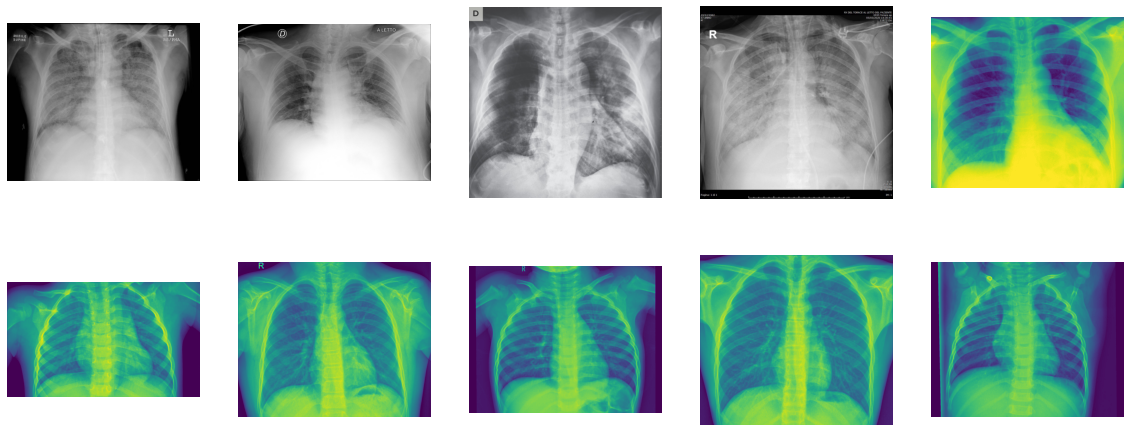

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

train_abnormal =  [os.path.join(abnormal_train, fname) for fname in np.random.choice(train_abnormal_names, 4, replace=False)]
train_normal =  [os.path.join(normal_train, fname) for fname in np.random.choice(train_normal_names, 4, replace=False)]
test_abnormal = [os.path.join(abnormal_test, str(np.random.choice(test_abnormal_names)))]
test_normal = [os.path.join(normal_test, str(np.random.choice(test_normal_names)))]

for i, img_path in enumerate(train_abnormal + test_abnormal + train_normal + test_normal):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        "C:/Users/hp/Downloads/xray_dataset_covid19/train/",  # This is the source directory for training images
        target_size=(800, 800),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


# Flow training images in batches of 128 using train_datagen generator
test_generator = train_datagen.flow_from_directory(
        "C:/Users/hp/Downloads/xray_dataset_covid19/test/",  # This is the source directory for testing images
        target_size=(800, 800),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(800, 800, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 1 for the other ('abnormal')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 798, 798, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 399, 399, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 397, 397, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 198, 198, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 98, 98, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.1),
              metrics=['accuracy'])

C:\Users\hp\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(train_generator,verbose=1)

C:\Users\hp\AppData\Local\Temp/ipykernel_4836/4239947770.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,verbose=1)


1/2 [==============>...............] - ETA: 2:12 - loss: 0.6914 - accuracy: 0.6000

In [ ]:
pred = model.predict_generator(test_generator)

In [ ]:
pred.astype(int)

In [ ]:
test_generator.classes

In [ ]:
history.history

In [ ]:
from keras.models import load_model 
model.save("network.h5") 
loaded_model = load_model("network.h5") 
loss, accuracy = loaded_model.evaluate(test_data, test_targets)
 